In [7]:
from tools import *
import pandas as pd
from catboost import Pool
from catboost import CatBoostRegressor
train = pd.read_csv('../input/train.csv')
training_extra = pd.read_csv('../input/training_extra.csv')
test = pd.read_csv('../input/test.csv')

# 探索性数据分析

In [2]:
print('-' * 20, 'train', '-'*20)
data_overview(train, False)
print('-' * 20, 'test', '-'*20)
data_overview(test, False)

-------------------- train --------------------


,count,mean,std,min,25%,50%,75%,max
id,300000.0,149999.500000,86602.684716,0.0,74999.750000,149999.500000,224999.250000,299999.0
Compartments,300000.0,5.443590,2.890766,1.0,3.000000,5.000000,8.000000,10.0
Weight Capacity (kg),299862.0,18.029994,6.966914,5.0,12.097867,18.068614,24.002375,30.0
Price,300000.0,81.411107,39.039340,15.0,47.384620,80.956120,115.018160,150.0


,Missing Count,Missing(%),Unique_counts,Unique_values,Dtype
id,0,0.0,300000,Much,int64
Brand,9705,3.2,5,"[Jansport, Under Armour, Nike, Adidas, Puma, nan]",object
Material,8347,2.8,4,"[Leather, Canvas, Nylon, nan, Polyester]",object
Size,6595,2.2,3,"[Medium, Small, Large, nan]",object
Compartments,0,0.0,10,"[7.0, 10.0, 2.0, 8.0, 1.0, 3.0, 5.0, 9.0, 6.0,...",float64
Laptop Compartment,7444,2.5,2,"[Yes, No, nan]",object
Waterproof,7050,2.4,2,"[No, Yes, nan]",object
Style,7970,2.7,3,"[Tote, Messenger, nan, Backpack]",object
Color,9950,3.3,6,"[Black, Green, Red, Blue, Gray, Pink, nan]",object
Weight Capacity (kg),138,0.0,181596,Much,float64


No duplicate rows found
-------------------- test --------------------


,count,mean,std,min,25%,50%,75%,max
id,200000.0,399999.500000,57735.171256,300000.0,349999.750000,399999.50000,449999.2500,499999.0
Compartments,200000.0,5.442855,2.888740,1.0,3.000000,5.00000,8.0000,10.0
Weight Capacity (kg),199923.0,17.993033,6.972079,5.0,12.068875,18.05475,23.9657,30.0


,Missing Count,Missing(%),Unique_counts,Unique_values,Dtype
id,0,0.0,200000,Much,int64
Brand,6227,3.1,5,"[Puma, Nike, Adidas, nan, Under Armour, Jansport]",object
Material,5613,2.8,4,"[Leather, Canvas, Nylon, Polyester, nan]",object
Size,4381,2.2,3,"[Small, Medium, Large, nan]",object
Compartments,0,0.0,10,"[2.0, 7.0, 9.0, 1.0, 8.0, 6.0, 5.0, 3.0, 10.0,...",float64
Laptop Compartment,4962,2.5,2,"[No, Yes, nan]",object
Waterproof,4811,2.4,2,"[No, Yes, nan]",object
Style,5153,2.6,3,"[Tote, Backpack, Messenger, nan]",object
Color,6785,3.4,6,"[Green, Blue, Black, Red, Pink, Gray, nan]",object
Weight Capacity (kg),77,0.0,128897,Much,float64


No duplicate rows found


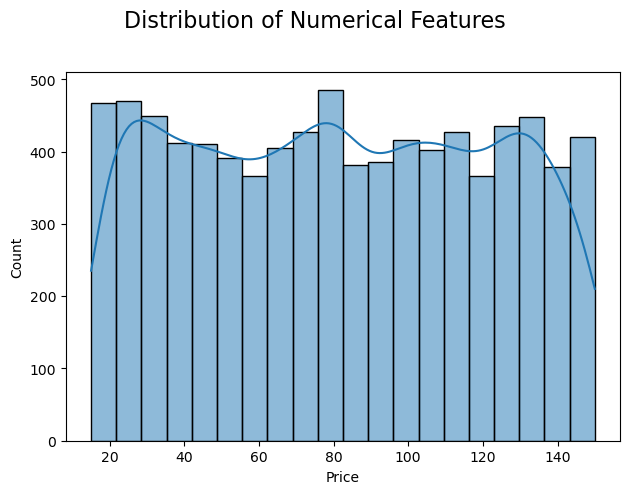

In [3]:
# plot_distribution(train[train['Brand'].isna()], ['Price'], 'num')
plot_distribution(train[train['Material'].isna()], ['Price'], 'num')
# plot_distribution(train[train['Size'].isna()], ['Price'], 'num')
# plot_distribution(train[train['Laptop Compartment'].isna()], ['Price'], 'num')
# plot_distribution(train[train['Waterproof'].isna()], ['Price'], 'num')
# plot_distribution(train[train['Style'].isna()], ['Price'], 'num')
# plot_distribution(train[train['Color'].isna()], ['Price'], 'num')

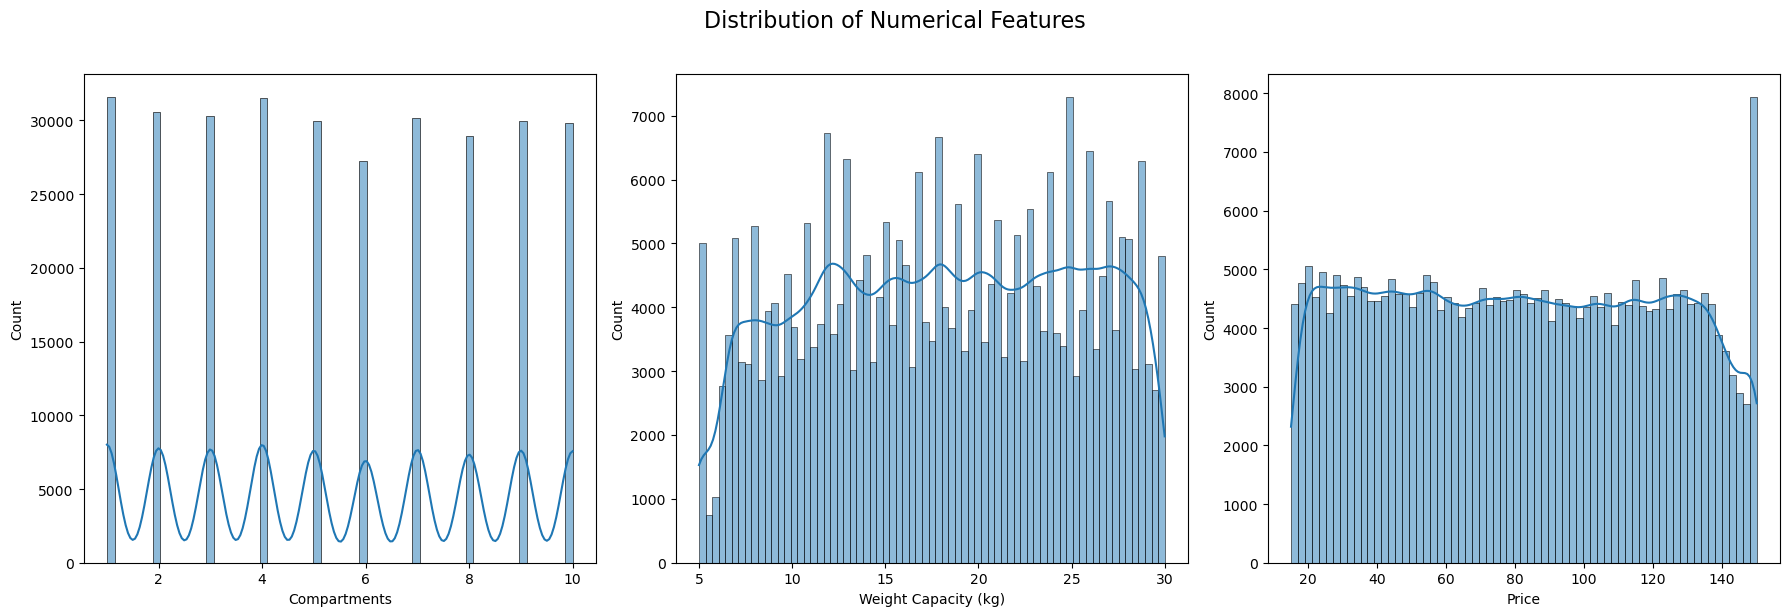

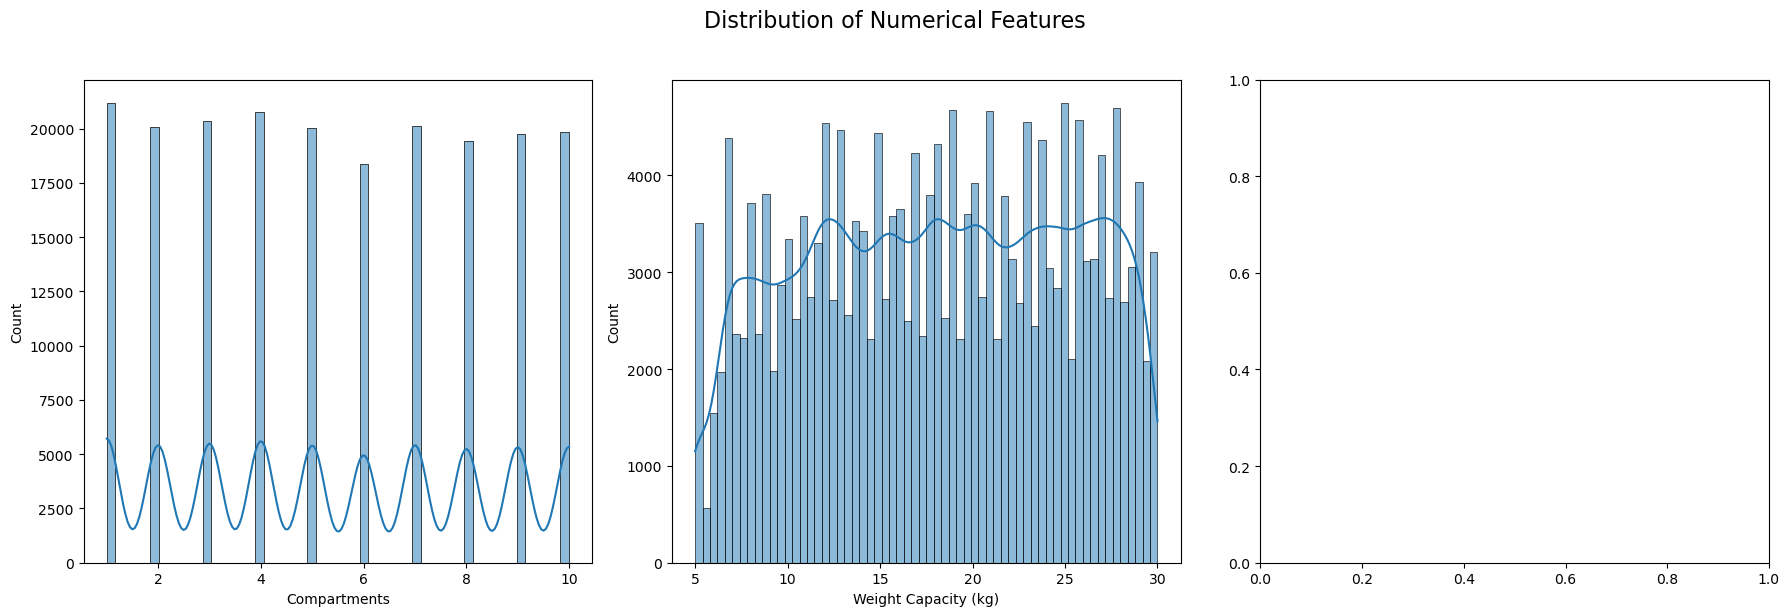

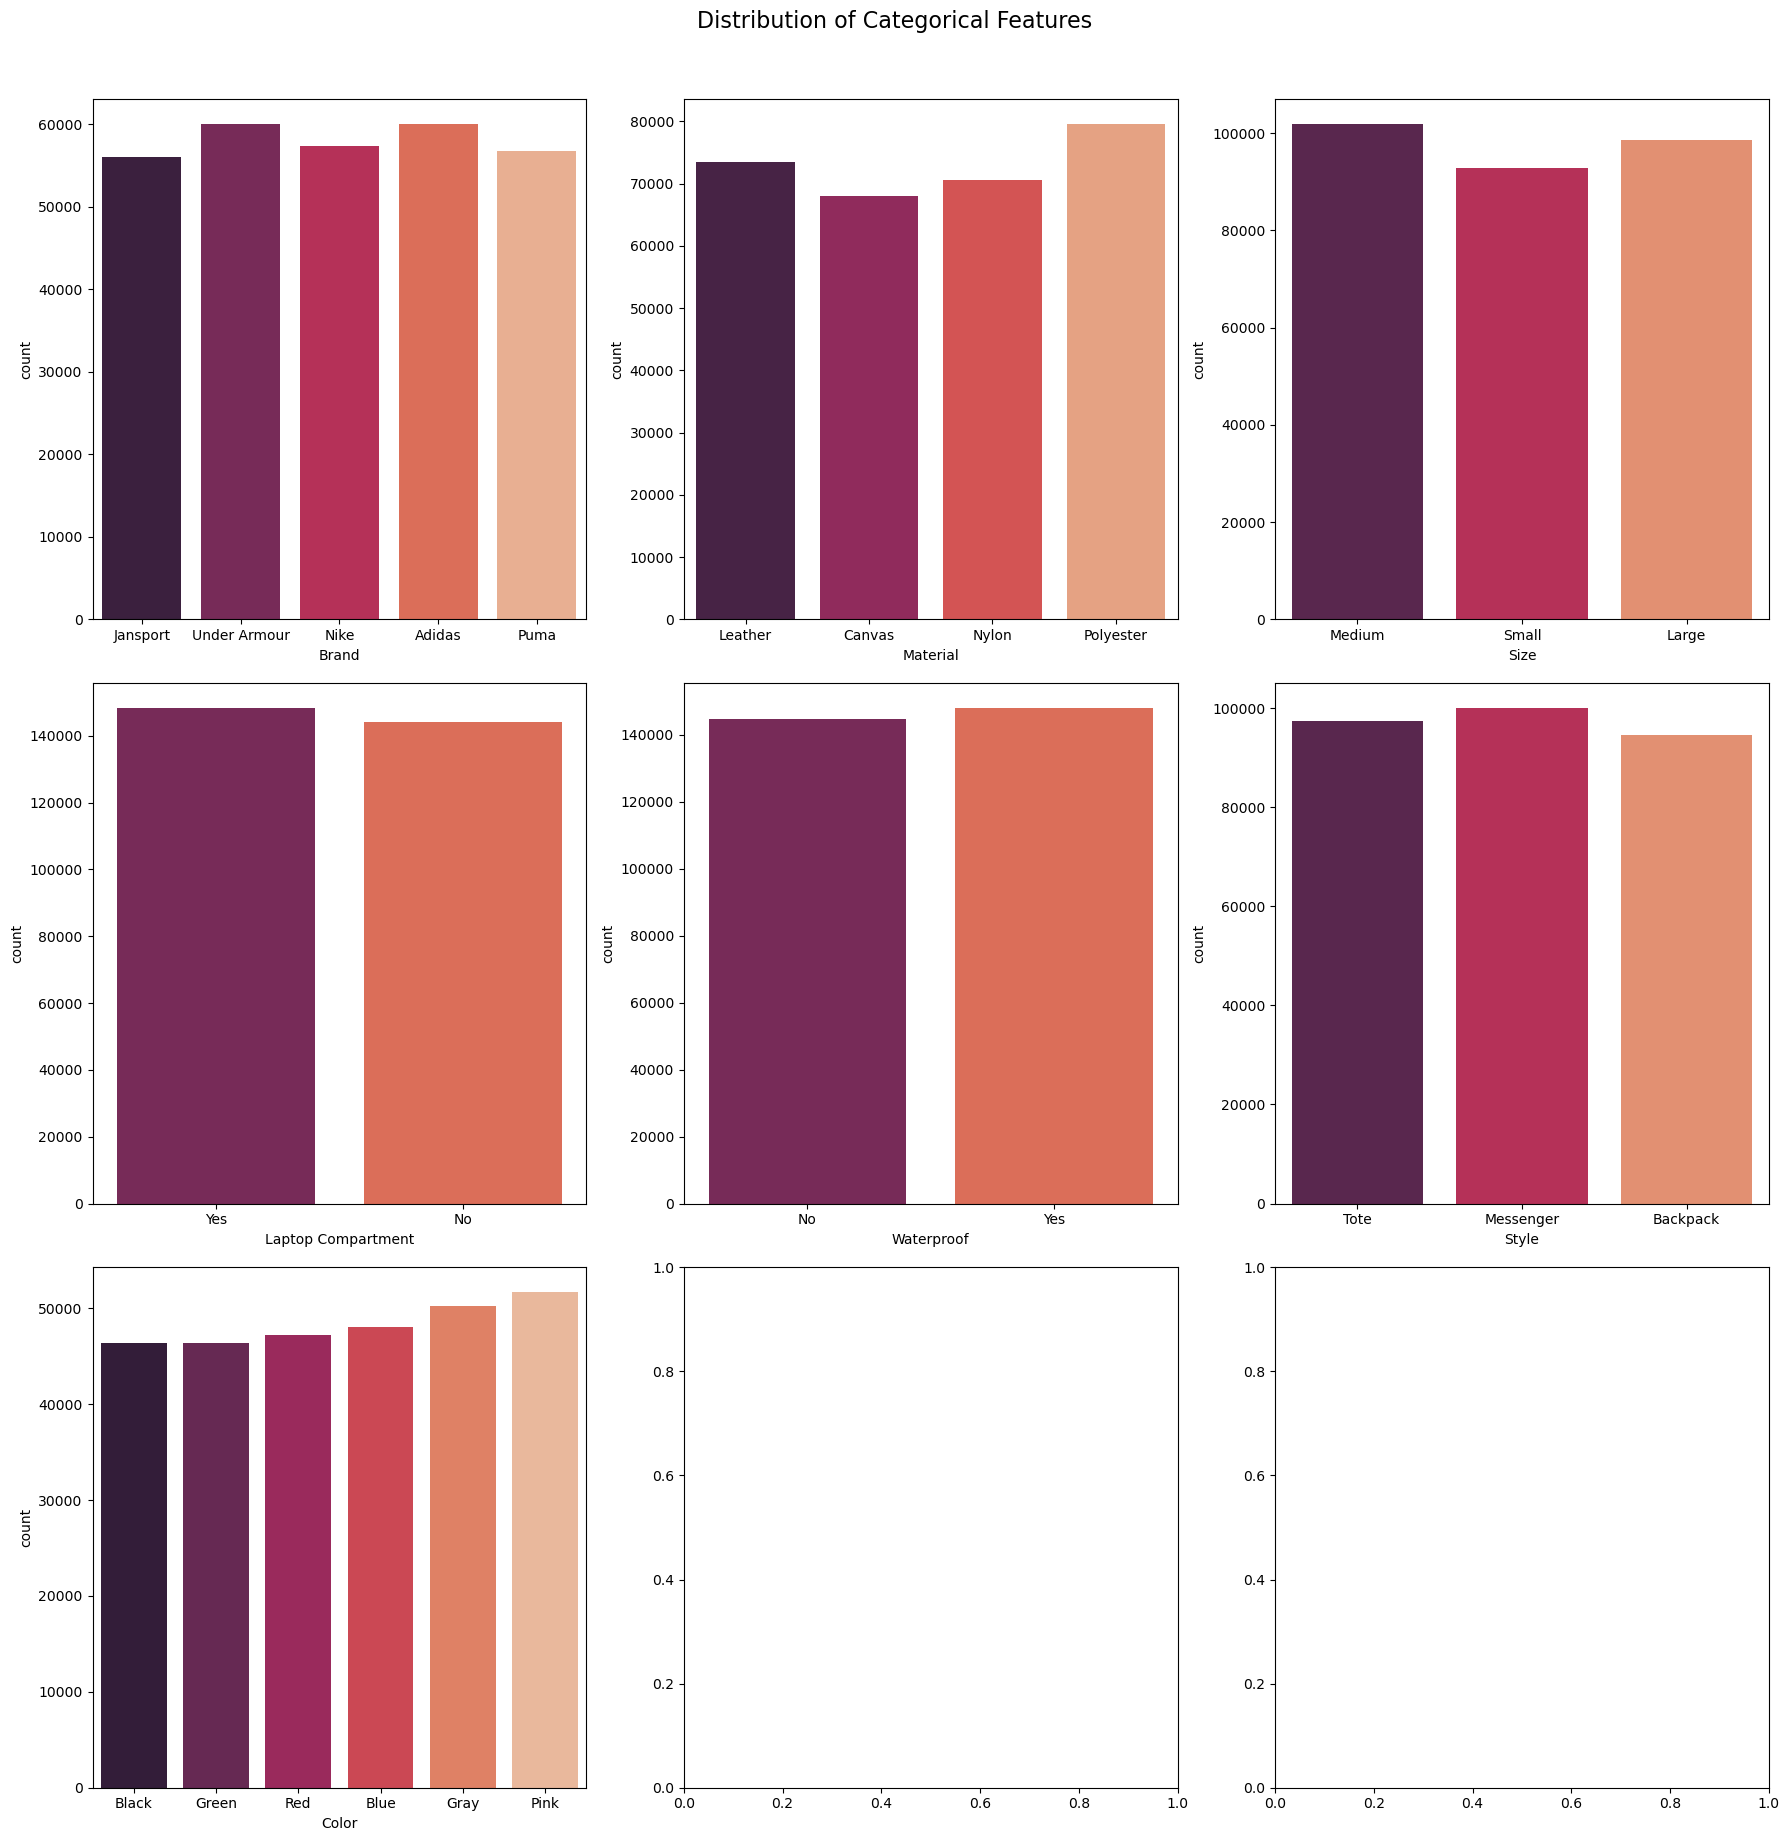

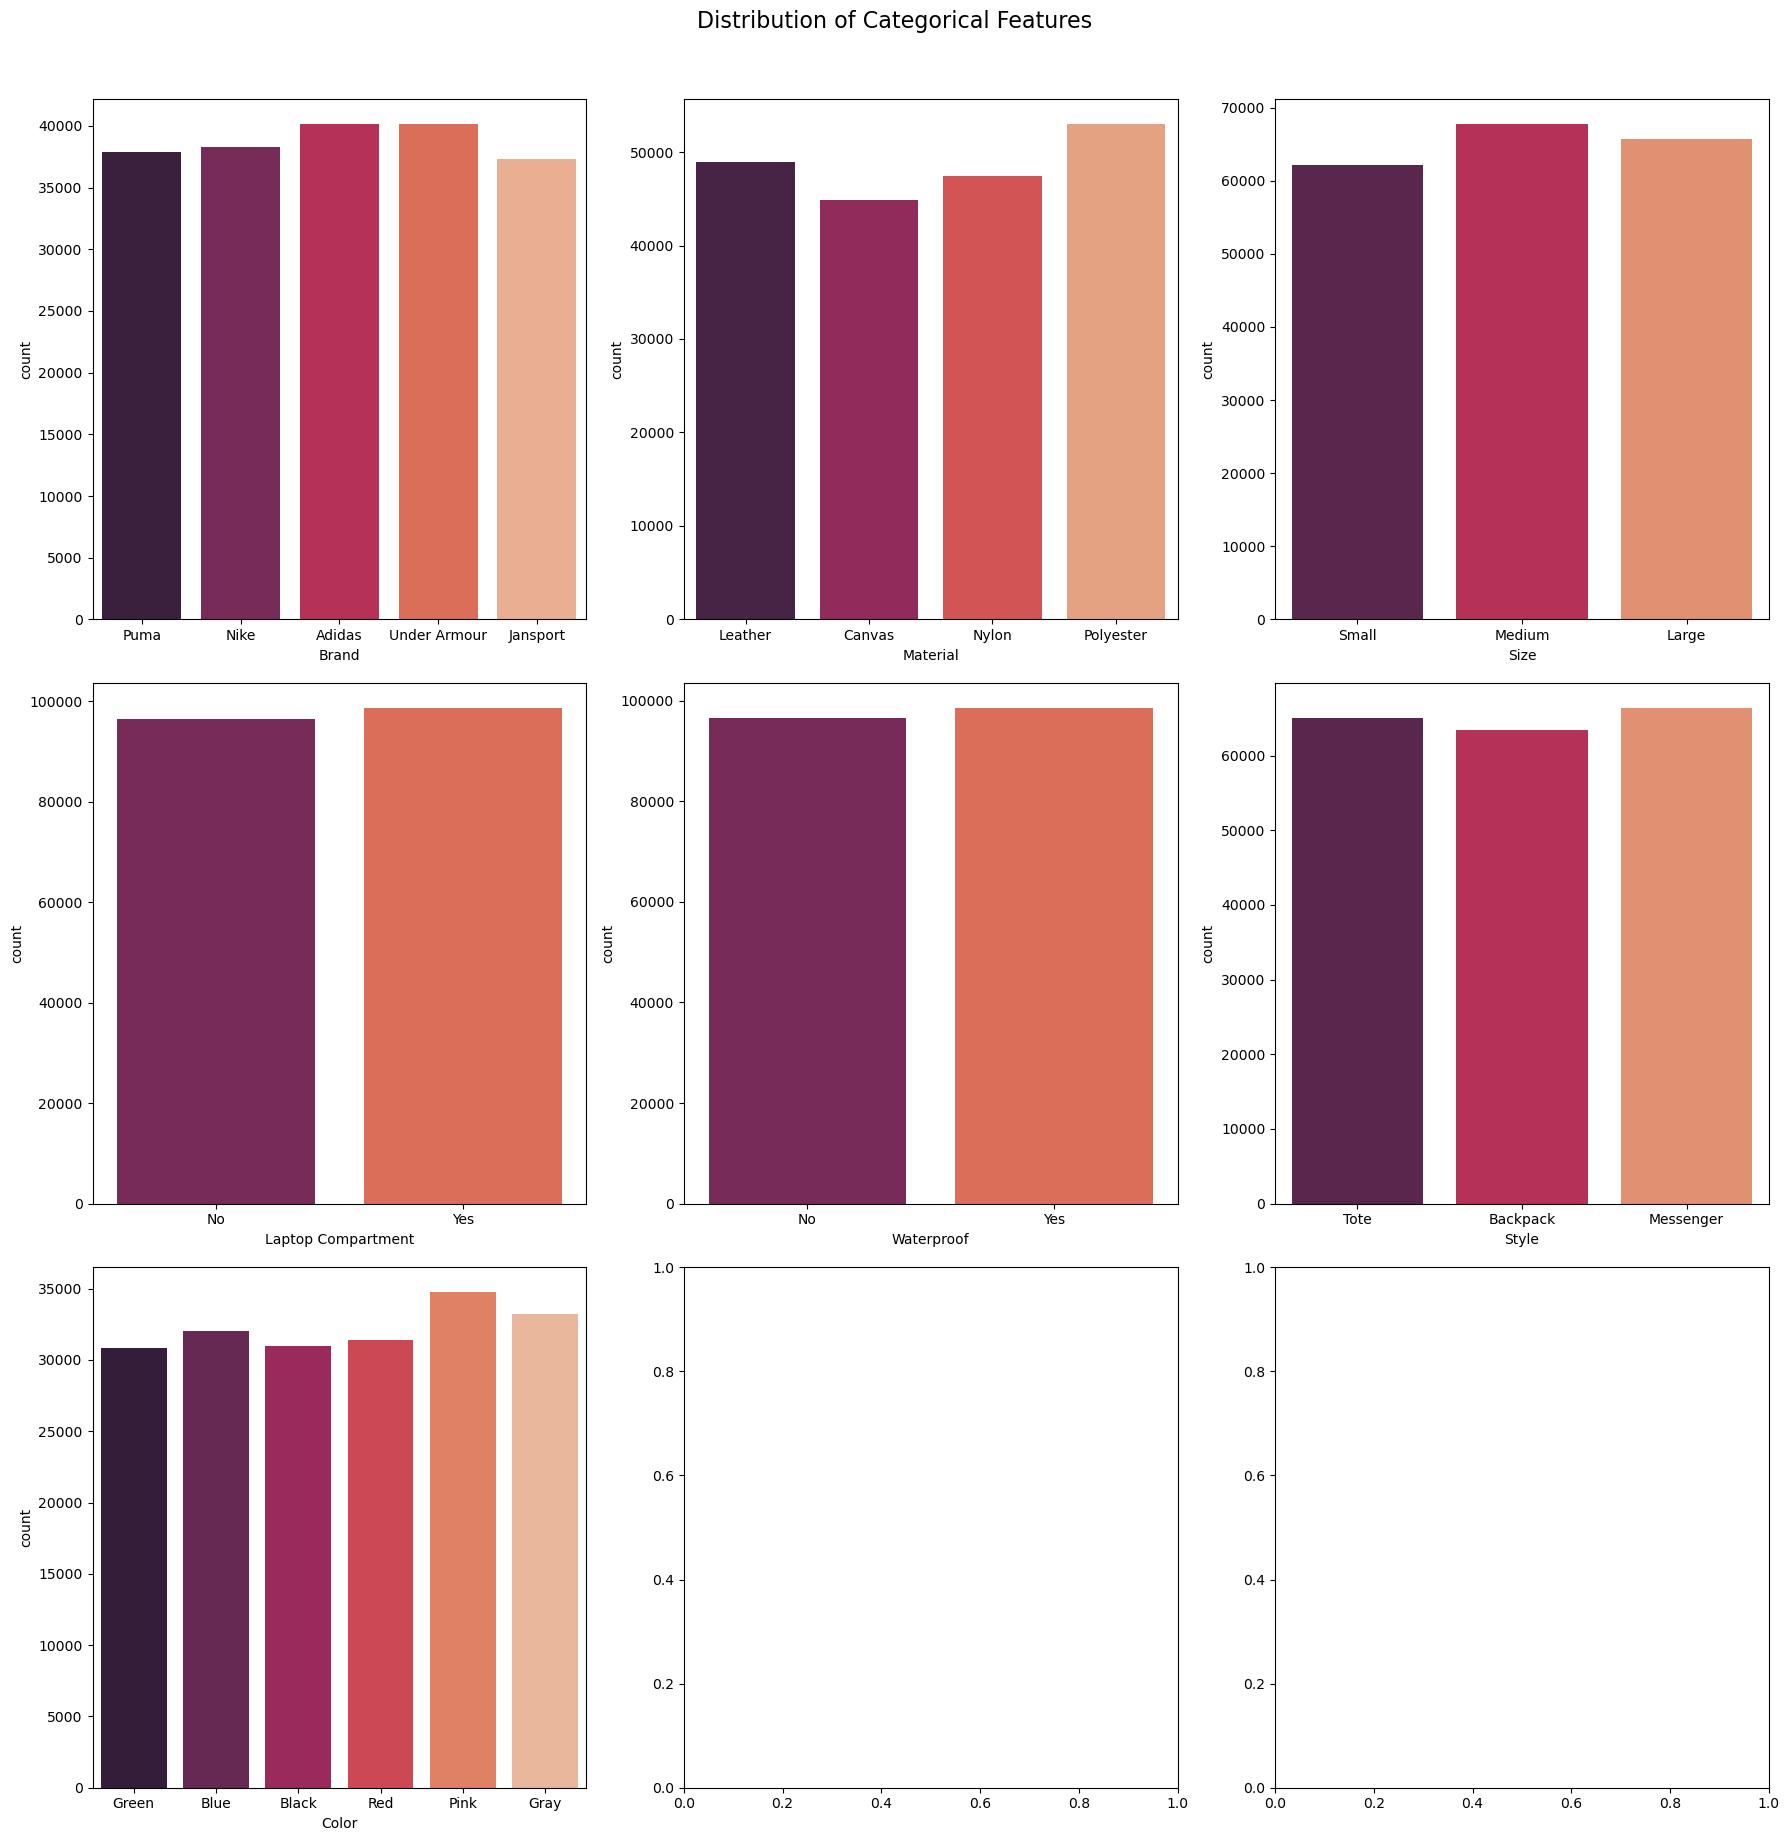

In [4]:
num_columns = ['Compartments', 'Weight Capacity (kg)', 'Price']
num_columns2 = ['Compartments', 'Weight Capacity (kg)']
cat_columns = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
plot_distribution(train, num_columns, 'num')
# plot_distribution(training_extra, num_columns, 'num')
plot_distribution(test, num_columns2, 'num')

plot_distribution(train, cat_columns, 'cat')
# plot_distribution(training_extra, cat_columns, 'cat')
plot_distribution(test, cat_columns, 'cat')

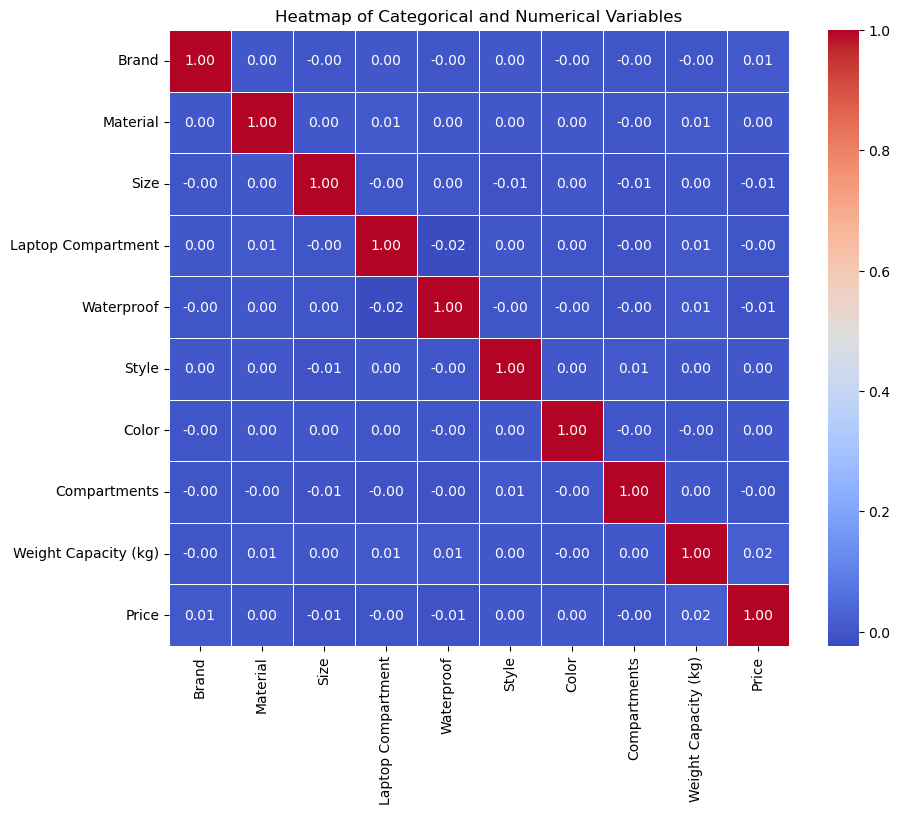

In [7]:
plot_heat(train, num_columns, cat_columns)

# 数据清洗

In [14]:
# 合并训练集与测试集
train["DatasetType"] = "train"
test["DatasetType"] = "test"
combined = pd.concat([train, test], axis=0).reset_index(drop=True)

In [15]:
data_overview(combined, False, False)

,Missing Count,Missing(%),Unique_counts,Unique_values,Dtype
id,0,0.0,500000,Much,int64
Brand,15932,3.2,5,"[Jansport, Under Armour, Nike, Adidas, Puma, nan]",object
Material,13960,2.8,4,"[Leather, Canvas, Nylon, nan, Polyester]",object
Size,10976,2.2,3,"[Medium, Small, Large, nan]",object
Compartments,0,0.0,10,"[7.0, 10.0, 2.0, 8.0, 1.0, 3.0, 5.0, 9.0, 6.0,...",float64
Laptop Compartment,12406,2.5,2,"[Yes, No, nan]",object
Waterproof,11861,2.4,2,"[No, Yes, nan]",object
Style,13123,2.6,3,"[Tote, Messenger, nan, Backpack]",object
Color,16735,3.3,6,"[Black, Green, Red, Blue, Gray, Pink, nan]",object
Weight Capacity (kg),215,0.0,282377,Much,float64


No duplicate rows found


In [ ]:
# 特征类型
num_columns = ['Compartments', 'Weight Capacity (kg)']
cat_columns = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
feature_columns = ['Price']

# 整理并划分训练集与验证集
test = test.replace([None], 'NaN').drop(['id', 'DatasetType'], axis=1)
X = train.replace([None], 'NaN').drop(['id', 'Price', 'DatasetType'], axis=1)
y = train['Price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# 创建 Pool 对象
cat_features =  ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
train_pool = Pool(data=X, label=y, cat_features=cat_features)

catboost_baseline = CatBoostRegressor(iterations=1200, 
                                      learning_rate=0.01,
                                      loss_function='RMSE',
                                      verbose=5,
                                      task_type='GPU',
                                      allow_writing_files=False)
catboost_baseline.fit(train_pool)

0:	learn: 39.0387213	total: 68.3ms	remaining: 1m 21s
5:	learn: 39.0359438	total: 359ms	remaining: 1m 11s
10:	learn: 39.0331565	total: 629ms	remaining: 1m 7s
15:	learn: 39.0309033	total: 912ms	remaining: 1m 7s
20:	learn: 39.0286377	total: 1.18s	remaining: 1m 5s
25:	learn: 39.0266220	total: 1.44s	remaining: 1m 5s
30:	learn: 39.0246486	total: 1.71s	remaining: 1m 4s
35:	learn: 39.0229512	total: 1.98s	remaining: 1m 4s
40:	learn: 39.0211840	total: 2.27s	remaining: 1m 4s
45:	learn: 39.0196614	total: 2.54s	remaining: 1m 3s
50:	learn: 39.0182986	total: 2.81s	remaining: 1m 3s
55:	learn: 39.0169604	total: 3.08s	remaining: 1m 2s
60:	learn: 39.0157712	total: 3.34s	remaining: 1m 2s
65:	learn: 39.0146202	total: 3.61s	remaining: 1m 2s
70:	learn: 39.0133338	total: 3.86s	remaining: 1m 1s
75:	learn: 39.0122278	total: 4.15s	remaining: 1m 1s
80:	learn: 39.0113433	total: 4.43s	remaining: 1m 1s
85:	learn: 39.0102728	total: 4.72s	remaining: 1m 1s
90:	learn: 39.0092611	total: 5s	remaining: 1m
95:	learn: 39.008

In [ ]:
catboost_baseline.predict(test)
save_model(catboost_baseline, 'catboost_baseline')
submit('catboost_baseline','Price', test)

array([81.42722698, 82.58318765, 81.73402458, ..., 81.96511827,
       81.08494767, 81.5050646 ])

In [22]:
from tools import *
from models import *
import pandas as pd

train = pd.read_csv('../input/train.csv')[:1000]
test = pd.read_csv('../input/test.csv')

# 合并训练集与测试集
train["DatasetType"] = "train"
test["DatasetType"] = "test"
combined = pd.concat([train, test], axis=0).reset_index(drop=True)

# 特征类型
num_columns = ['Compartments', 'Weight Capacity (kg)']
cat_columns = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
feature_columns = ['Price']

# 数值型数据归一化，离散型数据独热编码
train = preprocess_cat(train, cat_columns).drop(cat_columns, axis=1)
train = preprocess_num(train, num_columns).drop(num_columns, axis=1)
train['Weight Capacity (kg)Standard'] = train['Weight Capacity (kg)Standard'].fillna(train['Weight Capacity (kg)Standard'].mean())
X = train.drop(['id', 'Price', 'DatasetType'], axis=1)
y = train['Price']

test = preprocess_cat(test, cat_columns).drop(cat_columns, axis=1)
test = preprocess_num(test, num_columns).drop(num_columns, axis=1)
test['Weight Capacity (kg)Standard'] = test['Weight Capacity (kg)Standard'].fillna(test['Weight Capacity (kg)Standard'].mean())
test = test.drop(['id', 'DatasetType'], axis=1)

# 划分训练集与测试集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

['Brand_Adidas', 'Brand_Jansport', 'Brand_Nike', 'Brand_Puma', 'Brand_Under Armour', 'Brand_nan', 'Material_Canvas', 'Material_Leather', 'Material_Nylon', 'Material_Polyester', 'Material_nan', 'Size_Large', 'Size_Medium', 'Size_Small', 'Size_nan', 'Laptop Compartment_No', 'Laptop Compartment_Yes', 'Laptop Compartment_nan', 'Waterproof_No', 'Waterproof_Yes', 'Waterproof_nan', 'Style_Backpack', 'Style_Messenger', 'Style_Tote', 'Style_nan', 'Color_Black', 'Color_Blue', 'Color_Gray', 'Color_Green', 'Color_Pink', 'Color_Red', 'Color_nan']
['CompartmentsStandard', 'Weight Capacity (kg)Standard']
['Brand_Adidas', 'Brand_Jansport', 'Brand_Nike', 'Brand_Puma', 'Brand_Under Armour', 'Brand_nan', 'Material_Canvas', 'Material_Leather', 'Material_Nylon', 'Material_Polyester', 'Material_nan', 'Size_Large', 'Size_Medium', 'Size_Small', 'Size_nan', 'Laptop Compartment_No', 'Laptop Compartment_Yes', 'Laptop Compartment_nan', 'Waterproof_No', 'Waterproof_Yes', 'Waterproof_nan', 'Style_Backpack', 'Style_

In [34]:
data_overview(train)

,id,Price,DatasetType,Brand_Adidas,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Brand_nan,Material_Canvas,...,Style_nan,Color_Black,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red,Color_nan,CompartmentsStandard,Weight Capacity (kg)Standard
0,0,112.15875,train,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.494614,-0.920966
1,1,68.88056,train,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.521495,1.311468
2,2,39.17320,train,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.216854,-0.194656
3,3,80.60793,train,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.836908,-0.729647
4,4,86.02312,train,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.559148,-0.035080


,count,mean,std,min,25%,50%,75%,max
id,1000.0,4.995000e+02,288.819436,0.000000,249.750000,499.500000,749.250000,999.000000
Price,1000.0,7.883777e+01,38.525493,15.000000,44.213510,77.199720,112.188700,150.000000
CompartmentsStandard,1000.0,1.065814e-16,1.000500,-1.559148,-0.874560,0.152321,0.836908,1.521495
Weight Capacity (kg)Standard,1000.0,2.344791e-16,1.000500,-1.875282,-0.832788,-0.008746,0.904617,1.715552


,Missing Count,Missing(%),Unique_counts,Unique_values,Dtype
id,0,0.0,1000,Much,int64
Price,0,0.0,967,Much,float64
DatasetType,0,0.0,1,[train],object
Brand_Adidas,0,0.0,2,"[0.0, 1.0] Categories (2, float64): [0.0, 1.0]",category
Brand_Jansport,0,0.0,2,"[1.0, 0.0] Categories (2, float64): [0.0, 1.0]",category
Brand_Nike,0,0.0,2,"[0.0, 1.0] Categories (2, float64): [0.0, 1.0]",category
Brand_Puma,0,0.0,2,"[0.0, 1.0] Categories (2, float64): [0.0, 1.0]",category
Brand_Under Armour,0,0.0,2,"[0.0, 1.0] Categories (2, float64): [0.0, 1.0]",category
Brand_nan,0,0.0,2,"[0.0, 1.0] Categories (2, float64): [0.0, 1.0]",category
Material_Canvas,0,0.0,2,"[0.0, 1.0] Categories (2, float64): [0.0, 1.0]",category


No duplicate rows found


In [32]:
def best_lightgbm(X : pd.DataFrame,
                      y : pd.DataFrame, 
                      scoring='accuracy',
                      task='clf',
                      boosting_type = 'gbdt'):
    '''
    lightgbm参数寻优\n
    X：输入模型的特征\n
    y：输入模型的标签\n
    scoring：模型的评价标准
        分类任务可取的值：['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
        回归任务可取的值：['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']\n
    task:
        clf: 分类任务
        reg: 回归任务\n
    boosting_type:
        gbdt: 训练速度快，适用于大多数场景
        dart: 数据量小且容易过拟合的场景
        rf: 高维数据或需要强正则化的场景，防止过拟合的能力强
        
    return: 输出最佳的模型
    '''
    if task == 'clf':
        param_grid = {'num_leaves': [31, 63],  # [31, 63]
                      'max_depth': [3, 7, -1],  # [3, 5, 7, -1]
                      'min_split_gain': [0, 0.1, 0.2],  # [0, 0.1, 0.2]
                      'min_child_weight': [0.001, 0.1, 1],  # [0.001, 0.01, 0.1, 1]
                      'min_child_samples': [10, 20, 50],  # [10, 20, 50]
                      'subsample_freq': [0],  # [5, 10]
                      'colsample_bytree' : [0.8, 1],  # [0.8, 1]
                      'reg_alpha': [0, 0.1],  # [0, 0.1]
                      'reg_lambda': [0, 0.1]}  # [0, 0.1]
        model = lgb.LGBMClassifier(boosting_type=boosting_type, 
                                   learning_rate=0.01,
                                   n_estimators=200,  # 1000
                                   n_jobs=-1)
    elif task == 'reg':
        param_grid = {'num_leaves': [31, 63],  # [31, 63]
                      'max_depth': [4, 5],  # [3, 5, 7, -1]
                      'min_split_gain': [0, 0.1, 0.2],  # [0, 0.1, 0.2]
                      'min_child_weight': [0.001, 0.1, 1],  # [0.001, 0.01, 0.1, 1]
                      'min_child_samples': [10, 20, 50],  # [10, 20, 50]
                      'subsample_freq': [0],  # [5, 10]
                      'colsample_bytree' : [0.8, 1],  # [0.8, 1]
                      'reg_alpha': [0, 0.1],  # [0, 0.1]
                      'reg_lambda': [0, 0.1]}  # [0, 0.1]
        model = lgb.LGBMRegressor(boosting_type=boosting_type, 
                                  learning_rate=0.01,
                                  n_estimators=20,  # 1000
                                  n_jobs=-1)
    
    # 使用GridSearchCV进行超参数调优
    grid_search = GridSearchCV(model, param_grid, scoring=scoring, 
                               n_jobs=-1, cv=5, verbose=10,error_score='raise')
    grid_search.fit(X, y)
    print(f'LightGBM Best Params: ',grid_search.best_params_)
    print(f'LightGBM Best Score: ', grid_search.best_score_)
    return grid_search.best_estimator_

lightgbm = best_lightgbm(X, y, scoring='neg_root_mean_squared_error', task='reg')

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 362
[LightGBM] [Info] Number of data points in the train set: 1000, number of used features: 34
[LightGBM] [Info] Start training from score 78.837772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [33]:
save_model(lightgbm, 'lightgbm')
submit('lightgbm', 'Price', test)

lightgbm is successfully saved!
